# Focus

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("focus.csv")

In [3]:
df.shape

(4589, 9)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
1,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
2,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
3,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
4,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0


In [5]:
df["engineSize"].value_counts()

engineSize
1.0    2179
1.5    1233
2.0     755
1.6     331
2.3      64
0.0      11
1.8      10
2.5       5
1.4       1
Name: count, dtype: int64

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000
mean,2016.996731,13184.818043,23731.193288,111.136849,60.088865,1.361342
std,2.097916,4509.851628,20501.778343,63.640874,10.732258,0.396201
min,2003.000000,495.000000,1.000000,0.000000,26.300000,0.000000
25%,2016.000000,10099.000000,9694.000000,20.000000,55.400000,1.000000
50%,2017.000000,12790.000000,17339.000000,145.000000,60.100000,1.500000
75%,2018.000000,16500.000000,31423.000000,145.000000,67.300000,1.600000
max,2020.000000,54995.000000,177644.000000,330.000000,83.100000,2.500000


Text(0, 0.5, 'Frekans')

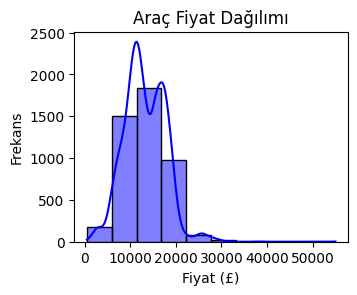

In [7]:

# Grafik boyutlarını belirleme
plt.figure(figsize=(12, 6))

# 1. Fiyat Dağılımı (Histogram)
plt.subplot(2, 3, 1)
sns.histplot(df["price"], bins=10, kde=True, color="blue")
plt.title("Araç Fiyat Dağılımı")
plt.xlabel("Fiyat (£)")
plt.ylabel("Frekans")

Text(0, 0.5, 'Yakıt Verimliliği (mpg)')

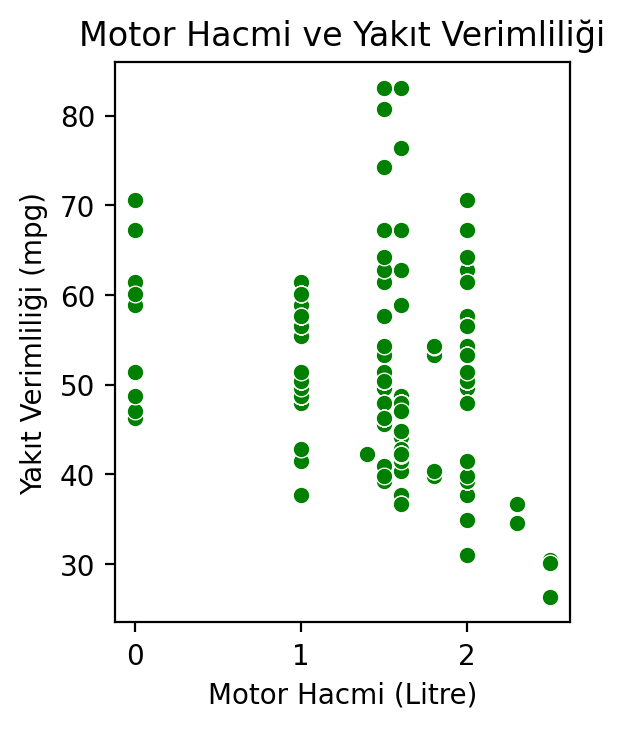

In [8]:
# 3. Motor Hacmi ve Yakıt Verimliliği İlişkisi (Dağılım Grafiği)
plt.figure(figsize=(10,8),dpi=200)
plt.subplot(2, 3, 3)
sns.scatterplot(x=df["engineSize"], y=df["mpg"], color="green")
plt.title("Motor Hacmi ve Yakıt Verimliliği")
plt.xlabel("Motor Hacmi (Litre)")
plt.ylabel("Yakıt Verimliliği (mpg)")

Text(0.5, 1.0, 'Yakıt Türlerine Göre Araç Dağılımı')

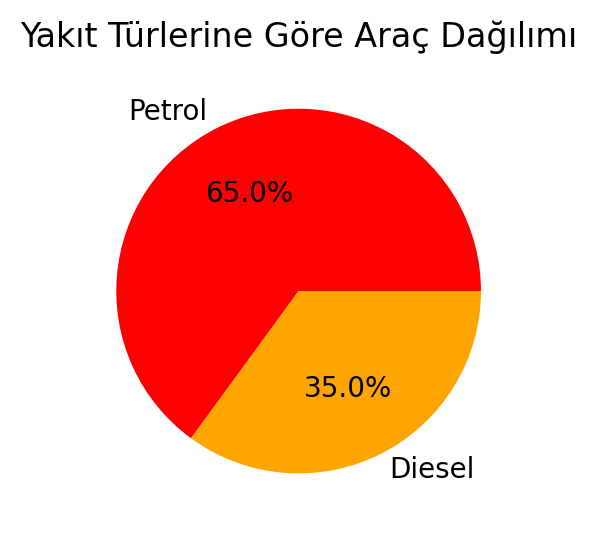

In [9]:
# 4. Yakıt Türüne Göre Araç Sayısı (Pasta Grafiği)
plt.figure(figsize=(10,8),dpi=200)
plt.subplot(2, 3, 4)
fuel_counts = df["fuelType"].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct="%1.1f%%", colors=["red", "orange", "blue"])
plt.title("Yakıt Türlerine Göre Araç Dağılımı")

Text(0, 0.5, 'Fiyat (£)')

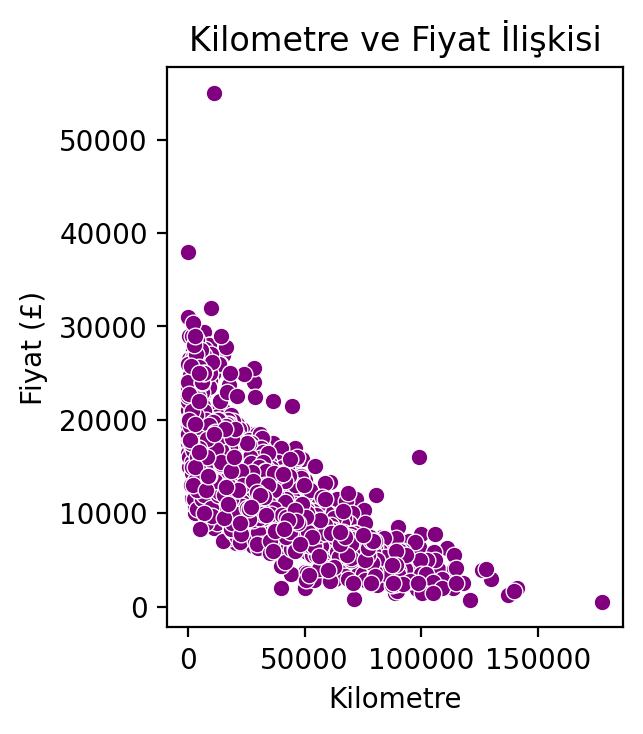

In [10]:
plt.figure(figsize=(10,8),dpi=200)
plt.subplot(2, 3, 5)
sns.scatterplot(x=df["mileage"], y=df["price"], color="purple")
plt.title("Kilometre ve Fiyat İlişkisi")
plt.xlabel("Kilometre")
plt.ylabel("Fiyat (£)")

Text(0.5, 1.02, 'Pair Plot (Scatter Matrix)')

<Figure size 800x600 with 0 Axes>

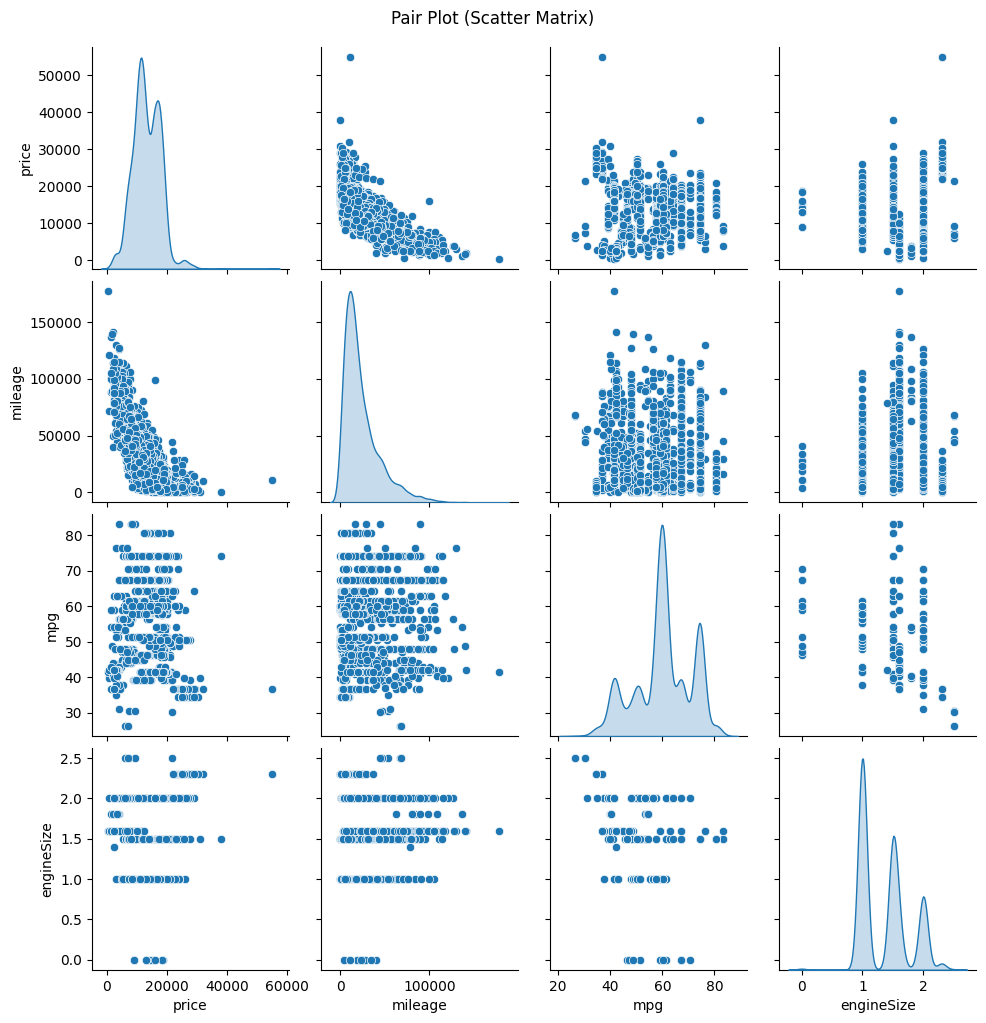

In [11]:
plt.figure(figsize=(8, 6))
sns.pairplot(df, vars=["price", "mileage", "mpg", "engineSize"], diag_kind="kde")
plt.suptitle("Pair Plot (Scatter Matrix)", y=1.02)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [13]:
x= df.drop("price" ,axis=1)
y=df["price"]

In [14]:
x.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

# Label encoding örneği
# Sayısal veri ya
le = LabelEncoder()
categorical_columns = x.select_dtypes(include=['object']).columns

for column in categorical_columns:
    x[column] = le.fit_transform(x[column])



# ya da bu işlem de yapılarbilir

'''

x['model'] = le.fit_transform(x['model'])
x['year'] = le.fit_transform(x['year'])
x['transmission'] = le.fit_transform(x['transmission'])
x['mileage'] = le.fit_transform(x['mileage'])
x['fuelType'] = le.fit_transform(x['fuelType'])
x['tax'] = le.fit_transform(x['tax'])
x['mpg'] = le.fit_transform(x['mpg'])
x['engineSize'] = le.fit_transform(x['engineSize'])

'''


"\n\nx['model'] = le.fit_transform(x['model'])\nx['year'] = le.fit_transform(x['year'])\nx['transmission'] = le.fit_transform(x['transmission'])\nx['mileage'] = le.fit_transform(x['mileage'])\nx['fuelType'] = le.fit_transform(x['fuelType'])\nx['tax'] = le.fit_transform(x['tax'])\nx['mpg'] = le.fit_transform(x['mpg'])\nx['engineSize'] = le.fit_transform(x['engineSize'])\n\n"

# Poly

In [16]:
model = PolynomialFeatures(degree=2 , include_bias= False)

In [17]:
model

PolynomialFeatures(include_bias=False)

In [18]:
feat = model.fit_transform(x)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
feat, y, test_size=0.3
   , random_state=9)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lineer = LinearRegression(fit_intercept=True)

In [22]:
lineer.fit(X_train , y_train)

LinearRegression()

In [23]:
pred = lineer.predict(X_test)

In [24]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [25]:
r2= r2_score(y_test , pred)
print("r2 : " , r2)

r2 :  0.9102132494780562


# EN İYİ DERECE

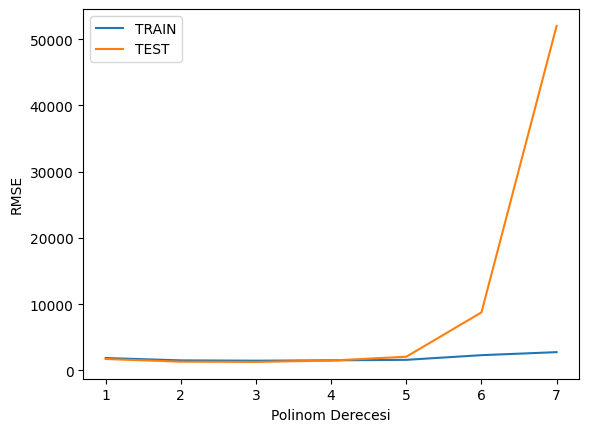

In [26]:
train_rmse = []
test_rmse = []

for d in range(1, 8):
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=9)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse_deger = np.sqrt(mean_squared_error(y_train, train_pred))  # RMSE for training
    test_rmse_deger = np.sqrt(mean_squared_error(y_test, test_pred))  # RMSE for test

    train_rmse.append(train_rmse_deger)
    test_rmse.append(test_rmse_deger)

# Görselleştirme
plt.plot(range(1, 8), train_rmse, label='TRAIN')
plt.plot(range(1, 8), test_rmse, label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()
plt.show()


# Final

In [32]:
final_poly = PolynomialFeatures(degree=3, include_bias=False)
final_conv = final_poly.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(final_conv, y, test_size=0.3, random_state=99)

final_lineer = LinearRegression(fit_intercept=True)

final_lineer.fit(X_train, y_train)
pred_lineer = final_lineer.predict(X_test)

# Hataları ve R2 hesaplamak
mae = round(mean_absolute_error(y_test, pred_lineer), 4)
rmse = round(np.sqrt(mean_squared_error(y_test, pred_lineer)), 4)
r2 = round(r2_score(y_test, pred_lineer), 4)

# Sonuçları yazdırma
print("Mae  : ", mae)
print("Rmse : ", rmse)
print("R2   : ", r2)


Mae  :  988.2571
Rmse :  1538.083
R2   :  0.8884
